#### Consider following code to answer further questions:

In [73]:
import pandas as pd
course_name = ['Data Science', 'Machine Learning', 'Big Data', 'Data Engineer']
duration = [2,3,6,4]
df = pd.DataFrame(data = {'course_name' : course_name, 'duration' : duration})

#### Q1. Write a code to print the data present in the second row of the dataframe, df.

In [74]:
# Below code will print the data in the second row
df.iloc[[1]]

,course_name,duration
1,Machine Learning,3


___

#### Q2. What is the difference between the functions loc and iloc in pandas.DataFrame?

Both the fucntions `loc()` and `iloc()` are used to fetch a subset of the dataframe based on the rows/columns we want to fetch.
However they differe in the way they take indexes.
**`loc()`** takes actual index of the DataFrame as it is - if they are named index then as named index (of type object) else if the DatafRame has only inbuilt index then it will accept inbuilt accepts.
**`iloc()`** will always take inbuilt index as the parameters to return the rows/columns.
___

#### Q3. Reindex the given dataframe using a variable, reindex = [3,0,1,2] and store it in the variable, new_df then find the output for both new_df.loc[2] and new_df.iloc[2].
#### Did you observe any difference in both the outputs? If so then explain it.

In [75]:
reindex = [3,0,1,2]
new_df = df.reindex(labels=reindex)

print(f"Result of df:\n{df.loc[[2]]} \nResult of new_df:\n{new_df.loc[[2]]}")

Result of df:
  course_name  duration
2    Big Data         6 
Result of new_df:
  course_name  duration
2    Big Data         6


There are no differences. This is because by applying `reindex()` we are just chanding the order of existing rows based on index and not adding anew index to existing rows in the existing order.
___

#### Consider the below code to answer further questions:

In [76]:
import pandas as pd
import numpy as np
columns = ['column_1', 'column_2', 'column_3', 'column_4', 'column_5', 'column_6']
indices = [1,2,3,4,5,6]
#Creating a dataframe:
df1 = pd.DataFrame(np.random.rand(6,6), columns = columns, index = indices)

#### Q4. Write a code to find the following statistical measurements for the above dataframe df1:
1. mean of each and every column present in the dataframe.
2. standard deviation of column, ‘column_2’

In [77]:
#1. mean of each and evry columns present in the dataframe
df1.apply('mean') # OR df1.mean()

column_1    0.464247
column_2    0.414173
column_3    0.436829
column_4    0.615519
column_5    0.247771
column_6    0.671731
dtype: float64

In [78]:
#2. standard deviation of column, ‘column_2’
df1['column_2'].std()

0.30107912164479783

___

#### Q5. Replace the data present in the second row of column, ‘column_2’ by a string variable then find the mean of column, column_2.
#### If you are getting errors in executing it then explain why.

In [79]:
# df1.loc[2,['column_2']]
df1.loc[2,['column_2']] = 'decimal number'
df1['column_2'].mean()

TypeError: unsupported operand type(s) for +: 'float' and 'str'

The above operation resuklted in an error (`TypeError`) since to calculate *mean* first all the values will be added and then divided by total number of values. However, since we have changed the data type of a value to string, the `+` is not supported between a string and int objects.
___

#### Q6. What do you understand about the windows function in pandas and list the types of windows functions?

In the context of pandas, the term "**window function**" refers to a group of functions that operate on a specified window or a subset of data within a DataFrame. These functions are primarily used for performing calculations over sliding or rolling windows of data.

Pandas provides several window functions that can be used with the `rolling()` and `expanding()` methods. Here are some commonly used window functions:

1. Mean (Average): Computes the mean value of the elements within the window.
2. Sum: Calculates the sum of the elements within the window.
3. Min: Returns the minimum value within the window.
4. Max: Returns the maximum value within the window.
5. Count: Counts the number of non-null values within the window.
6. Median: Calculates the median value within the window.
7. Standard Deviation: Computes the standard deviation of the elements within the window.
8. Variance: Calculates the variance of the elements within the window.
9. Covariance: Computes the covariance between two windows of data.
10. Correlation: Calculates the correlation between two windows of data.
___

#### Q7. Write a code to print only the current month and year at the time of answering this question.

In [81]:
current_date = pd.to_datetime('2023-07-10 06:21:00')

print(f"Month : {current_date.month} - Year : {current_date.year}")


Month : 7 - Year : 2023


____

#### Q8. Write a Python program that takes in two dates as input (in the format YYYY-MM-DD) and calculates the difference between them in days, hours, and minutes using Pandas time delta. The program should prompt the user to enter the dates and display the result.

In [88]:
start_date = input("Please enter start date in YYYY-MM-DD format: ")
end_date = input("Please enter end date in YYYY-MM-DD format: ")

time_delta = pd.to_datetime(end_date) - pd.to_datetime(start_date)

print(f"Difference between {start_date} and {end_date} is : {time_delta.components.days} days and {time_delta.components.hours} hours")


Difference between 2023-07-02 and 2023-07-10 is : 8 days and 0 hours


____

#### Q9. Write a Python program that reads a CSV file containing categorical data and converts a specified column to a categorical data type. The program should prompt the user to enter the file path, column name, and category order, and then display the sorted data.

In [108]:
# Prompt user for input
file_path = input("Please enter file path : ")
category_column = input("Column to be converted as Categorical: ")
category_order = input("Enter the category order (comma-separated): ").split(",")

df = pd.read_csv(file_path)
df[category_column] = pd.Categorical(df[category_column], categories=category_order, ordered=True)
sorted_df = df.sort_values(by=category_column)

print(f"Sorted data:\n{sorted_df}")

Sorted data:
            Name    Size  Number of Employees    Revenue
2     Some Works   Micro                    8       5000
3    My Delivery   Small                  200    1000000
5   Rabbit Shoes   Small                  300    2000000
1     Any Hotels  Medium                 1000   10000000
4       My World  Medium                  800   12000000
0      Abc Corps   Large                25000  100000000
6  XYZ Softwares   Large                10000  200000000


____

#### Q10. Write a Python program that reads a CSV file containing sales data for different products and visualizes the data using a stacked bar chart to show the sales of each product category over time. The program should prompt the user to enter the file path and display the chart.

<AxesSubplot:xlabel='Month'>

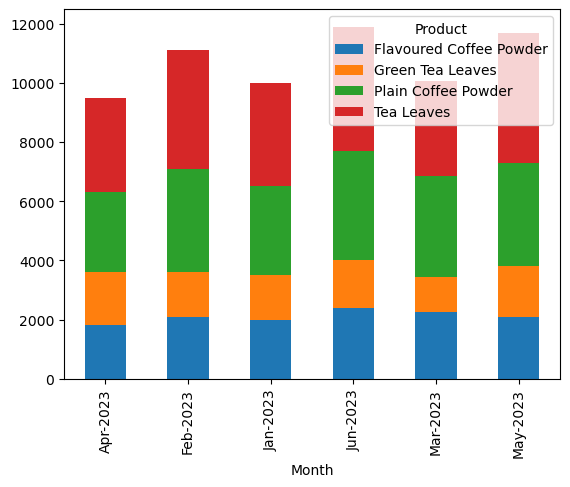

In [120]:
# Prompt user for input
file_path = input("Please enter file path : ")
# file_path="data_files/sales_by_product.csv"
sales_df = pd.read_csv(file_path)

sales_df['Month'] = pd.to_datetime(sales_df['Month'])
sales_df['Month'] = sales_df['Month'].dt.strftime('%b-%Y')

# ASSUMPTION: CSV file to be of format - Month,Product,Sales
# Pivot the DataFrame to get the sales for each month and product
df_pivot = sales_df.pivot(index='Month', columns='Product', values='Sales')

df_pivot.plot(kind='bar', stacked=True)

___

#### Q11. You are given a CSV file containing student data that includes the student ID and their test score. Write a Python program that reads the CSV file, calculates the mean, median, and mode of the test scores, and displays the results in a table.
#### The program should do the following:
* Prompt the user to enter the file path of the CSV file containing the student dataR
* Read the CSV file into a Pandas DataFrameR
* Calculate the mean, median, and mode of the test scores using Pandas toolsR
* Display the mean, median, and mode in a table.
#### Assume the CSV file contains the following columns:
* Student ID: The ID of the studentR
* Test Score: The score of the student's test.

In [142]:
# Prompt user for input
# file_path = input("Please enter file path : ")
file_path="data_files/student_data.csv"
df = pd.read_csv(file_path)
mean = df['Test Score'].mean()
med = df['Test Score'].median()
mode = df['Test Score'].mode()

print("+-----------+------+")
print("|Statistics |Value |")
print("+-----------+------+")
print(f"|Mean       |{mean} |")
print(f"|Median     |{med} |")
print(f"|Mode       |{list(mode)} |")
print("+-----------+------+")

+-----------+------+
|Statistics |Value |
+-----------+------+
|Mean       |83.5 |
|Median     |85.0 |
|Mode       |[85] |
+-----------+------+


___